In [158]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Data Loading

In [159]:
XY_df = pd.read_csv('Train.csv')

In [160]:
XY = pd.read_csv("Train.csv").values

In [161]:
print(XY.shape)

(1600, 6)


In [162]:
X = XY[:,:-1]
Y = XY[:,-1]

## Data Normalisation

In [163]:
XY_df.describe()

,feature_1,feature_2,feature_3,feature_4,feature_5,target
count,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000
mean,0.004114,-0.027604,-0.044459,-0.042408,0.012005,0.318835
std,0.997338,1.021776,1.011768,1.017189,0.978654,110.741562
min,-3.380125,-3.314844,-3.153118,-3.250169,-2.851707,-379.829794
25%,-0.647165,-0.705030,-0.706385,-0.709504,-0.615880,-71.897040
50%,-0.000360,-0.043769,-0.041272,-0.029756,-0.013527,-0.610665
75%,0.682118,0.645442,0.639130,0.646290,0.650089,71.226603
max,3.287205,3.438895,3.216176,2.985410,3.321770,337.643014


In [164]:
## since the mean and std is 1 the data is already normalized

In [165]:
## if we want we can normalize the data again

In [166]:
print(X.shape,Y.shape)

(1600, 5) (1600,)


In [167]:
mu = X.mean(axis=0)

In [168]:
print(mu)

[ 0.0041143  -0.0276038  -0.04445943 -0.04240792  0.01200535]


In [169]:
sigma = X.std(axis=0)

In [170]:
print(sigma)

[0.99702582 1.02145636 1.01145129 1.01687155 0.97834768]


In [171]:
X = (X-mu)/sigma

In [172]:
print(X.mean(axis=0))

[-2.33146835e-17 -1.77635684e-17 -1.77635684e-17  2.33146835e-17
  8.88178420e-18]


In [173]:
print(X.std(axis=0))

[1. 1. 1. 1. 1.]


In [174]:
print(X.shape)

(1600, 5)


In [175]:
print(mu.shape,sigma.shape)

(5,) (5,)


## Data Visualisation

In [176]:
## since the training data has 5 features it will not be possible to generate a 6 to 7 dimensional graph using
## matplotlib

In [177]:
## we can visualise the individual feature trends with the target data but it will not give
## the complete picture

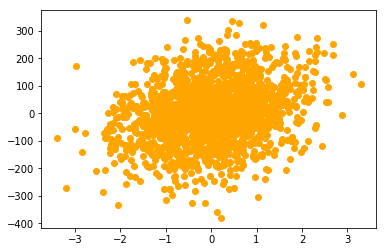

In [178]:
plt.scatter(X[:,0],Y,color="orange") ## 0th feature
plt.show()

In [179]:
def hypothesis(x,theta):
    return np.dot(x,theta)

In [180]:
def error(X,Y,theta):
    
    m = X.shape[0]
    err = 0
    for i in range(m):
        
        hx = hypothesis(X[i],theta)
        err += (hx-Y[i])**2
        
    return err/m    

In [181]:
def gradient1(X,Y,theta):
    
    m,n = X.shape
    grad = np.zeros((n,))
    
    for j in range(n):
        for i in range(m):
            
            hx = hypothesis(X[i],theta)
            grad[j] += (hx-Y[i])*X[i][j] 
            
    return grad/m           

In [182]:
def gradient2(X,Y,theta):
    
    m,n = X.shape
    grad = np.zeros((n,))
    
    for i in range(m):
        hx = hypothesis(X[i],theta)
        for j in range(n):
            grad[j] += (hx-Y[i])*X[i][j]
    
    return grad/m

In [183]:
def gradient_descent(X,Y,lr=0.2,max_itr=200):
    
    m,n = X.shape
    theta = np.zeros((n,))
    err_list = []
    
    for i in range(max_itr):
        
        err = error(X,Y,theta)
        err_list.append(err)
        
        grad = gradient1(X,Y,theta)
        
        for j in range(n):
            theta[j] = theta[j] - lr*grad[j]
           
    return theta,err_list    

In [184]:
ones = np.ones((X.shape[0],1))

In [185]:
X = np.hstack((ones,X))

In [186]:
theta,err_list = gradient_descent(X,Y)

In [187]:
print(theta)

[ 0.31883538 29.59359198 94.65067706  8.37544469 45.52303635  2.46461552]


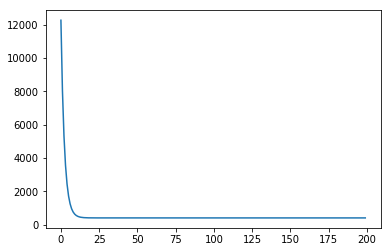

In [188]:
plt.plot(err_list)

In [189]:
x_test = pd.read_csv('Test.csv').values

In [190]:
print(x_test.shape)

(400, 5)


In [191]:
m = x_test.shape
y = []
one = np.ones((x_test.shape[0],1))
x_test = np.hstack((one,x_test))

In [192]:
c = hypothesis(x_test[0],theta)

In [193]:
print(c)

112.15168366025831


In [194]:
m = x_test.shape[0]

In [195]:
for i in range(m):
    y_ = hypothesis(x_test[i],theta)
    y.append(y_)

In [196]:
y = np.array(y)

In [197]:
print(y.shape)

(400,)


In [198]:
print(x_test.shape)

(400, 6)


In [199]:
df = pd.DataFrame(data=y,columns=['y'])

In [200]:
df.to_csv('multivariatePrediction.csv',index=False)